# Prediksi Harga Emas
- Dataset dapat di download melalui https://id.investing.com/commodities/gold-historical-data?__cf_chl_tk=c6oC005CKoLjyn0dqGM1oNTcW1SNJ8h20epEQyDzoV8-1687671240-0-gaNycGzNFqU

# 1. Import Modul dan library

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset
- Selanjutnya, kita akan memuat dataset prediksi harga saham dengan menggunakan fungsi read_csv() dari library pandas.

In [2]:
df = pd.read_csv('./dataset/Data_training.csv')
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,30/12/2022,"1.826,20","1.821,80","1.832,40","1.819,80","107,50K","0,01%"
1,29/12/2022,"1.826,00","1.812,30","1.827,30","1.811,20","105,99K","0,56%"
2,28/12/2022,"1.815,80","1.822,40","1.822,80","1.804,20","118,08K","-0,40%"
3,27/12/2022,"1.823,10","1.808,20","1.841,90","1.808,00","159,62K","0,74%"
4,26/12/2022,"1.809,70","1.805,80","1.811,95","1.805,55",NaN,"0,30%"
...,...,...,...,...,...,...,...
1030,08/01/2019,"1.285,90","1.287,40","1.288,40","1.280,20","221,92K","-0,31%"
1031,07/01/2019,"1.289,90","1.290,20","1.297,00","1.287,30","204,68K","0,32%"
1032,04/01/2019,"1.285,80","1.298,90","1.300,00","1.278,10","316,06K","-0,70%"
1033,03/01/2019,"1.294,80","1.290,40","1.296,90","1.286,40","244,54K","0,83%"


# 3. Exploratory Data Analysis (EDA):
- Tampilkan informasi umum tentang dataset, seperti jumlah baris dan kolom, tipe data, dan statistik deskriptif.
- Periksa adanya nilai yang missing value
- periksa data yang outlier
- periksa data duplikat.
1. Feature Engineering:
- Lakukan konversi tipe data jika diperlukan.
- Lakukan pemrosesan tambahan pada atribut jika diperlukan, seperti scaling, encoding kategori, atau pembuatan atribut baru.
2. Analisis Korelasi:
- Identifikasi kolom yang berfungsi sebagai atribut dan label.
- Hitung matriks korelasi antara atribut-atribut untuk melihat hubungan linear antara mereka.
- Tampilkan matriks korelasi dalam bentuk heatmap untuk memvisualisasikan korelasi.
- Periksa hubungan antara atribut-atribut menggunakan matriks korelasi atau scatter plot.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     1035 non-null   object
 1   Terakhir    1035 non-null   object
 2   Pembukaan   1035 non-null   object
 3   Tertinggi   1035 non-null   object
 4   Terendah    1035 non-null   object
 5   Vol.        1033 non-null   object
 6   Perubahan%  1035 non-null   object
dtypes: object(7)
memory usage: 56.7+ KB


## beri Ket & note tentang dimensi data dan perhatikan tipe data untuk semua kolom = object (perlu dilakukan casting/konversi tipe data)

In [4]:
# menampilkan informasi statistik data
df.describe()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
count,1035,1035,1035,1035,1035,1033,1035
unique,1035,925,909,939,930,1002,354
top,30/12/2022,"1.814,10","1.817,00","1.812,00","1.808,40","332,61K","0,00%"
freq,1,4,4,4,3,3,14


### terdapat kemungkinan missing value pada kolom Vol., perhatikan pada (jumlah data) count = 1027

In [5]:
# melihat frekuensi kemunculan data
df['Tanggal'].value_counts()

30/12/2022    1
02/04/2020    1
15/05/2020    1
14/05/2020    1
13/05/2020    1
             ..
26/08/2021    1
25/08/2021    1
24/08/2021    1
23/08/2021    1
02/01/2019    1
Name: Tanggal, Length: 1035, dtype: int64

In [6]:
print(df['Tanggal'].nunique())
df['Tanggal'].unique()

1035


array(['30/12/2022', '29/12/2022', '28/12/2022', ..., '04/01/2019',
       '03/01/2019', '02/01/2019'], dtype=object)

### data dikumpulkan dari tanggal 2 januari 2019- 09 maret 2023

In [7]:
df['Vol.'].nunique()

1002

In [8]:
# cek missing value
df.isna().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          2
Perubahan%    0
dtype: int64

In [9]:
# mengahapus missing value (karena hanya 1 data saja)
df=df.dropna()

In [10]:
#cek data duplikat
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

In [12]:
df['Vol.'].isnull().sum()

0

## Casting/Konversi tipe data

In [13]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
columns_harga = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
df[columns_harga] = df[columns_harga].replace(',', '', 
                                              regex=True).astype(float)
df['Vol.'] = df['Vol.'].str.replace(r'\.\d+', '', 
                                    regex=True).str.replace(',', '').str.replace('K', '000').astype(float)
df['Perubahan%'] = df['Perubahan%'].str.replace('%', '', 
                                                regex=True).str.replace(',', '.').astype(float)
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2022-12-30,1.8262,1.8218,1.8324,1.8198,10750000.0,0.01
1,2022-12-29,1.8260,1.8123,1.8273,1.8112,10599000.0,0.56
2,2022-12-28,1.8158,1.8224,1.8228,1.8042,11808000.0,-0.40
3,2022-12-27,1.8231,1.8082,1.8419,1.8080,15962000.0,0.74
5,2022-12-23,1.8042,1.8010,1.8122,1.7989,10546000.0,0.50
...,...,...,...,...,...,...,...
1030,2019-08-01,1.2859,1.2874,1.2884,1.2802,22192000.0,-0.31
1031,2019-07-01,1.2899,1.2902,1.2970,1.2873,20468000.0,0.32
1032,2019-04-01,1.2858,1.2989,1.3000,1.2781,31606000.0,-0.70
1033,2019-03-01,1.2948,1.2904,1.2969,1.2864,24454000.0,0.83


## Casting/Konversi tipe data

In [14]:
df.dtypes

Tanggal       datetime64[ns]
Terakhir             float64
Pembukaan            float64
Tertinggi            float64
Terendah             float64
Vol.                 float64
Perubahan%           float64
dtype: object

In [15]:
df.describe().round(2)

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
count,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00
mean,1.70,1.70,1.71,1.68,23686841.24,0.04
std,0.20,0.20,0.20,0.20,10683044.47,1.02
min,1.27,1.27,1.28,1.27,0.00,-4.99
25%,1.54,1.54,1.56,1.53,16707000.00,-0.40
50%,1.76,1.76,1.78,1.75,21424000.00,0.05
75%,1.83,1.83,1.85,1.82,28207000.00,0.55
max,2.07,2.08,2.09,2.05,81341000.00,5.95


In [16]:
print(df.dropna())
df.to_csv('./dataset/clean_data1.csv',index=False)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah        Vol.  \
0    2022-12-30    1.8262     1.8218     1.8324    1.8198  10750000.0   
1    2022-12-29    1.8260     1.8123     1.8273    1.8112  10599000.0   
2    2022-12-28    1.8158     1.8224     1.8228    1.8042  11808000.0   
3    2022-12-27    1.8231     1.8082     1.8419    1.8080  15962000.0   
5    2022-12-23    1.8042     1.8010     1.8122    1.7989  10546000.0   
...         ...       ...        ...        ...       ...         ...   
1030 2019-08-01    1.2859     1.2874     1.2884    1.2802  22192000.0   
1031 2019-07-01    1.2899     1.2902     1.2970    1.2873  20468000.0   
1032 2019-04-01    1.2858     1.2989     1.3000    1.2781  31606000.0   
1033 2019-03-01    1.2948     1.2904     1.2969    1.2864  24454000.0   
1034 2019-02-01    1.2841     1.2850     1.2910    1.2806  23533000.0   

      Perubahan%  
0           0.01  
1           0.56  
2          -0.40  
3           0.74  
5           0.50  
...      

## Beri Ket/Note terkait data statistik untuk semua atribut

# 4. Visualisasi Data:

- Buat visualisasi grafik untuk masing-masing atribut.
- Gunakan grafik seperti line plot, scatter plot, atau box plot untuk memahami tren, pola, dan variabilitas data.
- Analisis dan Interpretasi:

1. Lakukan analisis statistik terhadap atribut-atribut untuk mendapatkan wawasan lebih dalam.
2. Identifikasi atribut-atribut yang memiliki pengaruh signifikan terhadap harga saham.
3. Perhatikan pola dan tren dalam data yang dapat membantu dalam memahami faktor-faktor yang mempengaruhi harga saham.
4. Pastikan untuk menyelidiki masing-masing atribut secara terpisah dan melihat hubungan antara atribut-atribut tersebut.

# Korelasi setiap atribut terhadap harga penutupan 

Terakhir      1.000000
Pembukaan     0.996379
Tertinggi     0.998170
Terendah      0.998599
Vol.         -0.304522
Perubahan%    0.018287
Name: Terakhir, dtype: float64


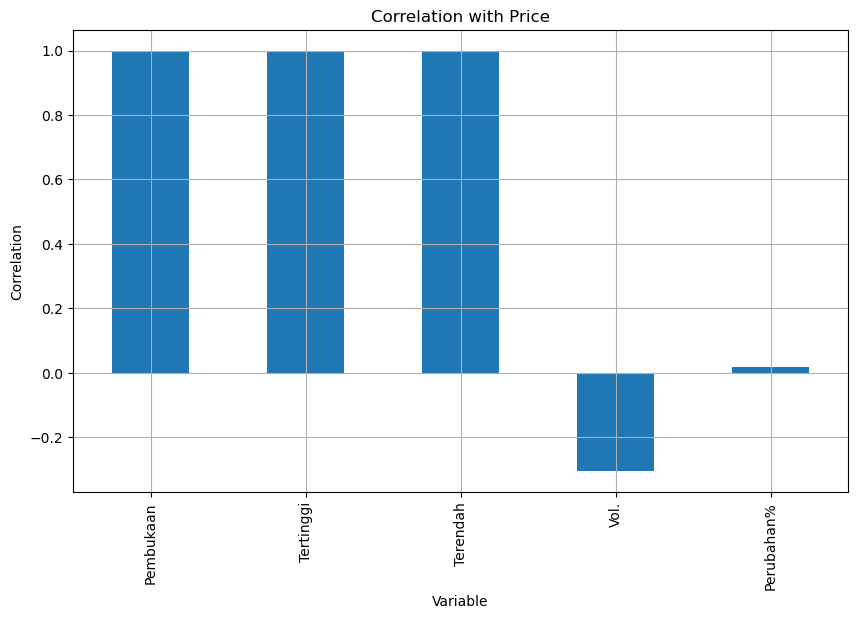

In [16]:
# Menghitung korelasi antara kolom Price dengan kolom lain
correlation = df.corr()['Terakhir']
print(correlation)

# Plot korelasi
plt.figure(figsize=(10, 6))
correlation.drop('Terakhir').plot(kind='bar')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.title('Correlation with Price')
plt.savefig('./grafik/korelasi.png')
plt.grid()
plt.show()


# 4-1. Distribusi Data Time series Harga Penutupan

In [17]:
#membagi waktu menjadi har,minggu,bulan,tahun
df['day'] =df['Tanggal'].dt.day
df['week'] =df['Tanggal'].dt.week
df['month'] =df['Tanggal'].dt.month 
df['year'] =df['Tanggal'].dt.year
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,day,week,month,year
0,2022-12-30,1.8262,1.8218,1.8324,1.8198,10750000.0,0.01,30,52,12,2022
1,2022-12-29,1.8260,1.8123,1.8273,1.8112,10599000.0,0.56,29,52,12,2022
2,2022-12-28,1.8158,1.8224,1.8228,1.8042,11808000.0,-0.40,28,52,12,2022
3,2022-12-27,1.8231,1.8082,1.8419,1.8080,15962000.0,0.74,27,52,12,2022
5,2022-12-23,1.8042,1.8010,1.8122,1.7989,10546000.0,0.50,23,51,12,2022
...,...,...,...,...,...,...,...,...,...,...,...
1030,2019-08-01,1.2859,1.2874,1.2884,1.2802,22192000.0,-0.31,1,31,8,2019
1031,2019-07-01,1.2899,1.2902,1.2970,1.2873,20468000.0,0.32,1,27,7,2019
1032,2019-04-01,1.2858,1.2989,1.3000,1.2781,31606000.0,-0.70,1,14,4,2019
1033,2019-03-01,1.2948,1.2904,1.2969,1.2864,24454000.0,0.83,1,9,3,2019


In [18]:
print(df.dropna())
df.to_csv('./dataset/clean_data.csv',index=False)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah        Vol.  \
0    2022-12-30    1.8262     1.8218     1.8324    1.8198  10750000.0   
1    2022-12-29    1.8260     1.8123     1.8273    1.8112  10599000.0   
2    2022-12-28    1.8158     1.8224     1.8228    1.8042  11808000.0   
3    2022-12-27    1.8231     1.8082     1.8419    1.8080  15962000.0   
5    2022-12-23    1.8042     1.8010     1.8122    1.7989  10546000.0   
...         ...       ...        ...        ...       ...         ...   
1030 2019-08-01    1.2859     1.2874     1.2884    1.2802  22192000.0   
1031 2019-07-01    1.2899     1.2902     1.2970    1.2873  20468000.0   
1032 2019-04-01    1.2858     1.2989     1.3000    1.2781  31606000.0   
1033 2019-03-01    1.2948     1.2904     1.2969    1.2864  24454000.0   
1034 2019-02-01    1.2841     1.2850     1.2910    1.2806  23533000.0   

      Perubahan%  day  week  month  year  
0           0.01   30    52     12  2022  
1           0.56   29    52     12  2

In [19]:
df.groupby('year')['Terakhir'].agg([len,min,max])

,len,min,max
year,,,
2019,258,1.2720,1.5604
2020,259,1.4779,2.0694
2021,258,1.6780,1.9544
2022,258,1.6309,2.0433


## Beri Keterangan

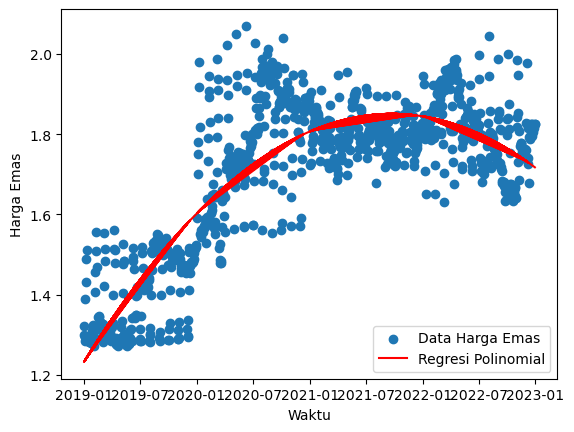

In [20]:
# Data harga Emas
X = df['Tanggal'].astype(np.int64) // 10**9  # Mengonversi tanggal ke unix timestamp (numerik)
y = df['Terakhir'].values  # Harga Emas

# Menggunakan regresi polinomial dengan derajat 2
coefficients = np.polyfit(X, y, 2)
polynomial = np.poly1d(coefficients)
y_pred = polynomial(X)

# Plot data asli dan kurva regresi polinomial
plt.scatter(df['Tanggal'], y, label='Data Harga Emas')
plt.plot(df['Tanggal'], y_pred, color='red', label='Regresi Polinomial')
plt.xlabel('Waktu')
plt.ylabel('Harga Emas')
plt.savefig('./grafik/harga.png')
plt.legend()
plt.show()

#### terjadi kenaikan harga yang signifikan pada awal tahun 2019-awal tahun 2021
#### Pada kurun waktu awal tahun 2021- awal tahun 2022 harga cederung stabil (perubahan harga tidak signifikan)
#### Sepanjang awal tahun2022 - awal tahun 2023 terjadi penurunan harga yang cukup signifikan

<Figure size 1600x600 with 0 Axes>

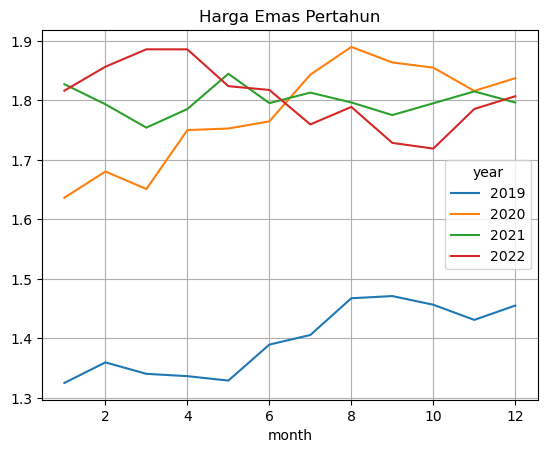

In [21]:
#visualisasi data harga saham
plt.figure(figsize=(16,6))
monthly_sales = pd.pivot_table(df, values = "Terakhir", columns = "year", index = "month")
plt.savefig('./grafik/hargaemas.png')
monthly_sales.plot()
plt.title('Harga Emas Pertahun')
plt.grid()

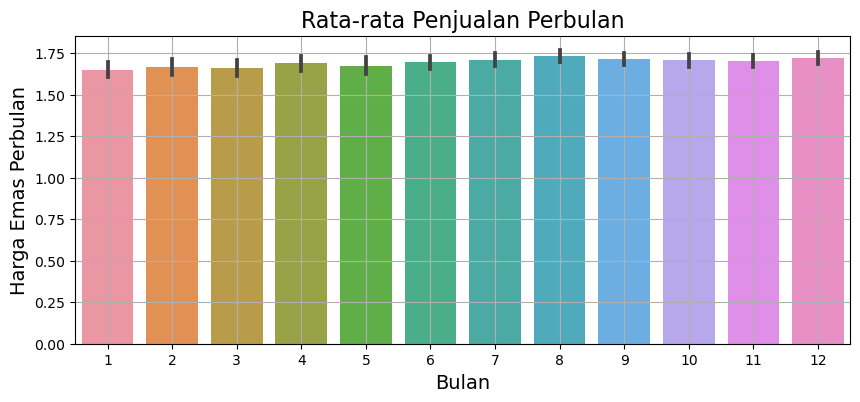

In [22]:
#visualisasi harga emas perbulan 
plt.figure(figsize=(10,4))
sns.barplot(x='month',y='Terakhir',data=df)
plt.ylabel('Harga Emas Perbulan',fontsize=14)
plt.xlabel('Bulan',fontsize=14)
plt.title('Rata-rata Penjualan Perbulan',fontsize=16)
plt.savefig('./grafik/penjualan perbulan.png')
plt.grid()

In [23]:
df.groupby('month')['Terakhir'].agg([len,min,max,sum])

,len,min,max,sum
month,,,,
1,88,1.2798,1.9789,145.3222
2,78,1.2720,1.9447,130.0503
3,87,1.2813,1.9863,144.4588
4,86,1.2732,2.0210,145.4594
5,87,1.2732,2.0493,145.8480
6,84,1.2838,2.0694,142.5495
7,90,1.2856,2.0280,154.1281
8,89,1.2814,2.0433,154.1283
9,87,1.2852,1.9882,149.2951


## Beri Ket

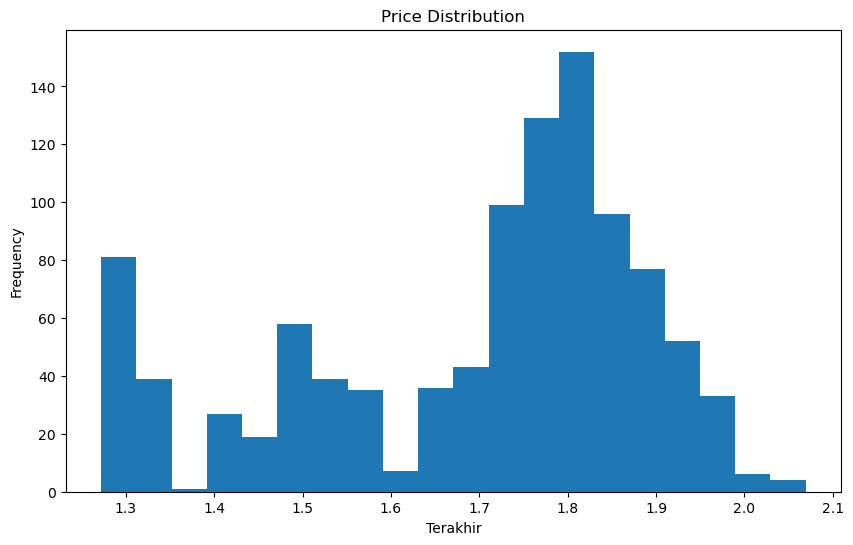

In [24]:
# Histogram harga saham
plt.figure(figsize=(10, 6))
plt.hist(df['Terakhir'], bins=20)
plt.xlabel('Terakhir')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.savefig('./grafik/frekuensiharga.png')
plt.show()

<Figure size 1600x600 with 0 Axes>

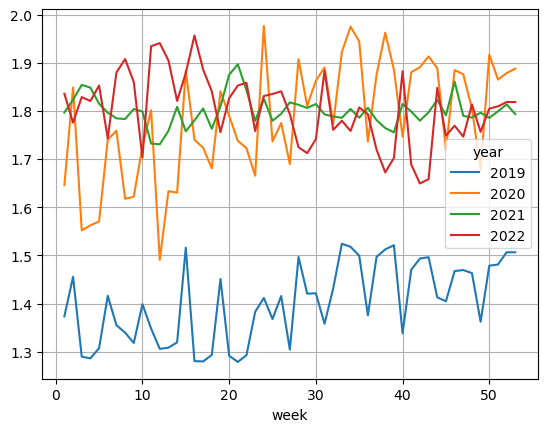

In [25]:
#Visualisasi data penjualan setiap minggu
plt.figure(figsize=(16,6))
Price = pd.pivot_table(df, values = "Terakhir", columns = "year", index = "week").interpolate()
Price.plot()
plt.savefig('./grafik/ClosingPerminggu.png')
plt.grid()

print(df['day'].interpolate().count())

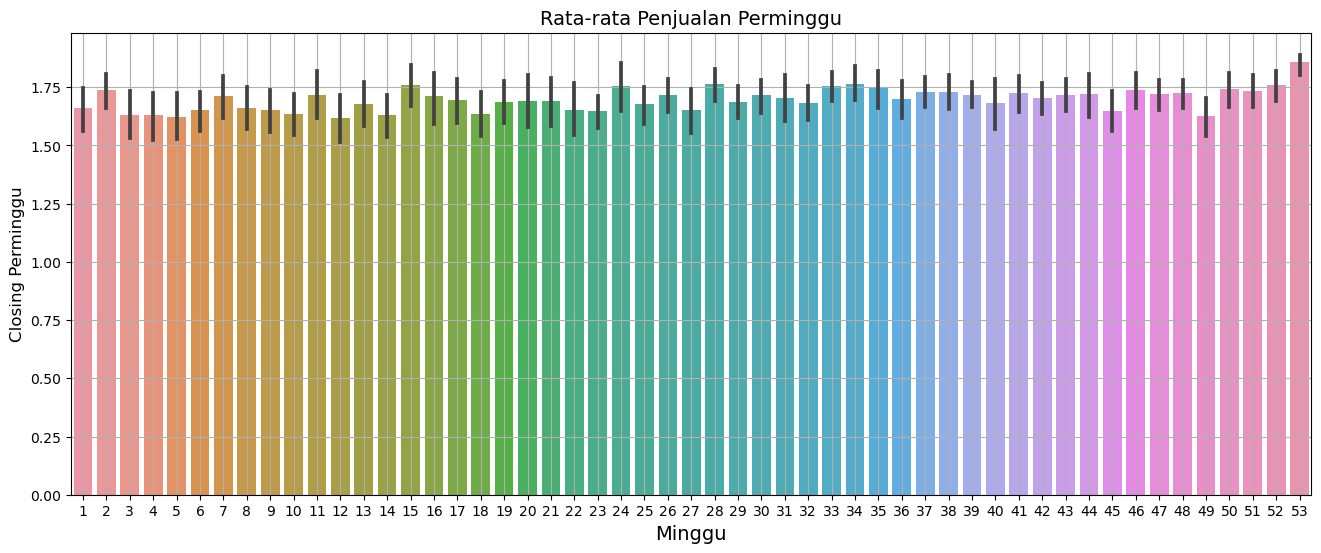

In [26]:
plt.figure(figsize=(16,6))
sns.barplot(x='week',y='Terakhir',data=df)
plt.ylabel('Closing Perminggu',fontsize=12)
plt.xlabel('Minggu',fontsize=14)
plt.title('Rata-rata Penjualan Perminggu',fontsize=14)
plt.savefig('./grafik/penjualan-minggu.png')
plt.grid()

In [27]:
df.groupby('week')['Terakhir'].mean().sort_values(ascending=False).head()

week
53    1.856450
34    1.763875
28    1.761961
52    1.761178
15    1.759413
Name: Terakhir, dtype: float64

# 4-2. Open (Harga Pembukaan)

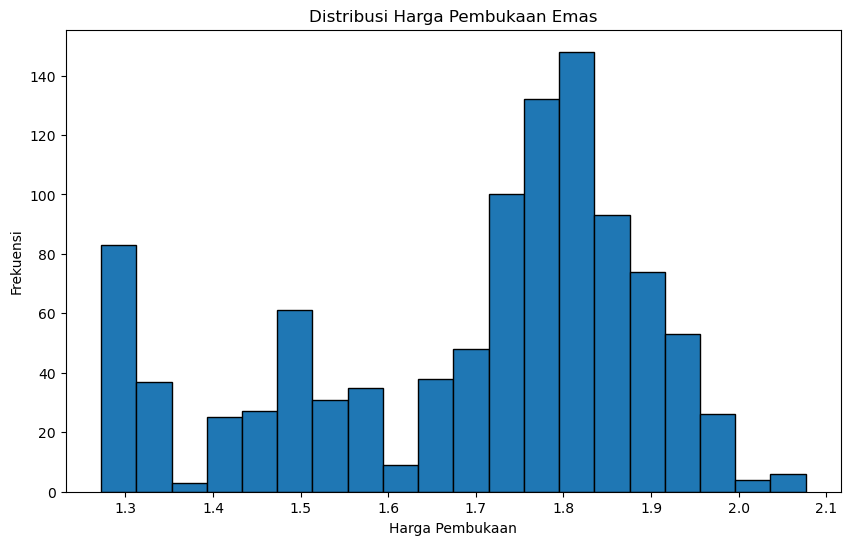

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['Pembukaan'], bins=20, edgecolor='k')
plt.title('Distribusi Harga Pembukaan Emas')
plt.xlabel('Harga Pembukaan')
plt.savefig('./grafik/harga Pembukaan.png')
plt.ylabel('Frekuensi')
plt.show()


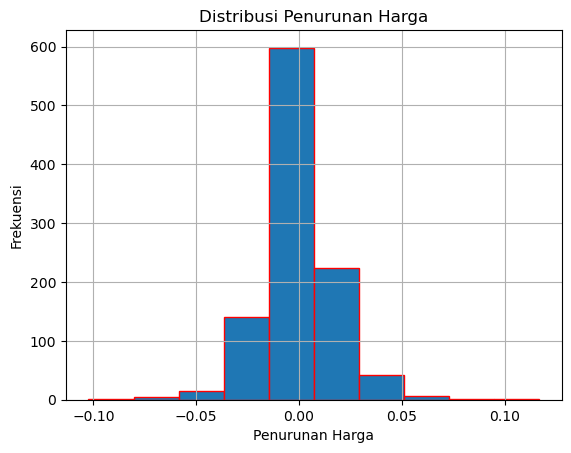

In [29]:
# Menghitung Penurunan Harga
df['Perubahan%'] = df['Pembukaan'].diff()

# Analisis Distribusi dan Visualisasi
plt.hist(df['Perubahan%'], bins=10, edgecolor='red')
plt.title('Distribusi Penurunan Harga')
plt.xlabel('Penurunan Harga')
plt.ylabel('Frekuensi')
plt.savefig('./grafik/hargapembukaan.png')
plt.grid(True)
plt.show()

### Penjelasan kode
- fungsi .diff() pada kolom 'Open' untuk menghitung perbedaan harga pembukaan antara hari ini dan hari sebelumnya. Hasilnya akan disimpan dalam kolom baru 'Price Change'.

In [30]:
df['Perubahan%'].describe().round(2)

count    1032.00
mean       -0.00
std         0.02
min        -0.10
25%        -0.01
50%        -0.00
75%         0.01
max         0.12
Name: Perubahan%, dtype: float64

## 4-3. Harga Tertinggi

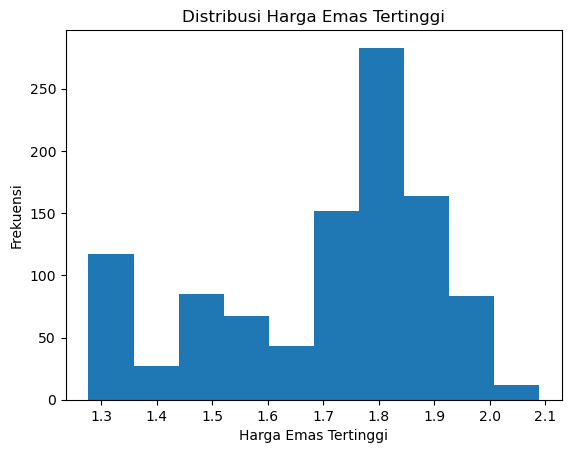

In [31]:
plt.hist(df['Tertinggi'], bins=10)
plt.title('Distribusi Harga Emas Tertinggi')
plt.xlabel('Harga Emas Tertinggi')
plt.ylabel('Frekuensi')
plt.savefig('./grafik/hargaTertinggi.png')
plt.show()


<Figure size 1600x600 with 0 Axes>

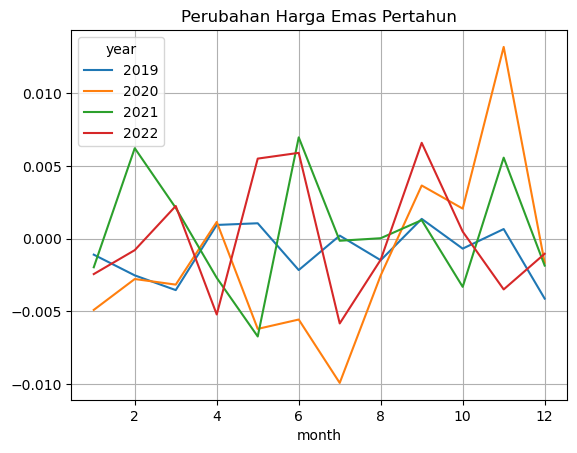

In [32]:
#visualisasi data harga emas
plt.figure(figsize=(16,6))
monthly_sales = pd.pivot_table(df, values = "Perubahan%", columns = "year", index = "month")
plt.savefig('./perubahan harga emas.png')
monthly_sales.plot()
plt.title('Perubahan Harga Emas Pertahun')
plt.savefig('./grafik/perubahanHarga.png')
plt.grid()

## Lanjutkan untuk semua Kolom dan beri keterangan untuk setiap grafik

# MembangunModel Mesin Learning

In [33]:
#membaca data yang telah dibersihkan
df=pd.read_csv('./dataset/clean_data.csv')
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,day,week,month,year
0,2022-12-30,1.8262,1.8218,1.8324,1.8198,10750000.0,0.01,30,52,12,2022
1,2022-12-29,1.8260,1.8123,1.8273,1.8112,10599000.0,0.56,29,52,12,2022
2,2022-12-28,1.8158,1.8224,1.8228,1.8042,11808000.0,-0.40,28,52,12,2022
3,2022-12-27,1.8231,1.8082,1.8419,1.8080,15962000.0,0.74,27,52,12,2022
4,2022-12-23,1.8042,1.8010,1.8122,1.7989,10546000.0,0.50,23,51,12,2022
...,...,...,...,...,...,...,...,...,...,...,...
1028,2019-08-01,1.2859,1.2874,1.2884,1.2802,22192000.0,-0.31,1,31,8,2019
1029,2019-07-01,1.2899,1.2902,1.2970,1.2873,20468000.0,0.32,1,27,7,2019
1030,2019-04-01,1.2858,1.2989,1.3000,1.2781,31606000.0,-0.70,1,14,4,2019
1031,2019-03-01,1.2948,1.2904,1.2969,1.2864,24454000.0,0.83,1,9,3,2019


In [34]:
df.isna().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
day           0
week          0
month         0
year          0
dtype: int64

In [35]:
df['Perubahan%'].dropna()
df.isna().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
day           0
week          0
month         0
year          0
dtype: int64

In [36]:
# menentukan atribut dan label
X = df[['Pembukaan', 'Tertinggi', 'Terendah','Vol.','Perubahan%','day','week','month','year']]
y = df['Terakhir']  # Kolom 'Price' menjadi label yang ingin diprediksi

In [37]:
#membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
print(X_test.shape)
X_train.shape

(207, 9)


(826, 9)

In [39]:
# membangun model mesin learning
regression = LinearRegression()
#melakukan pembelajaran/training
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# melakukan pengujian
y_pred = regression.predict(X_test)
y_pred

array([1.7054342 , 1.66890638, 1.95792337, 1.78766494, 1.27650738,
       1.31000993, 1.95295473, 1.51413374, 1.80206887, 1.84956045,
       1.48761428, 1.79445568, 1.77261268, 1.45292949, 1.74589518,
       1.94208907, 1.57220445, 1.78890811, 1.83536695, 1.9221192 ,
       1.49137988, 1.28395161, 1.51119934, 1.48958155, 1.90189704,
       1.87704677, 1.85823416, 1.72969286, 1.2914636 , 1.67644806,
       1.76737376, 1.71281137, 1.51956464, 1.90361081, 1.8723253 ,
       1.73716626, 1.69848412, 1.82535404, 1.84972232, 1.8105637 ,
       1.81659517, 1.55869291, 1.81670159, 1.80476797, 1.8868243 ,
       1.9652969 , 1.84108892, 1.40683792, 1.87576444, 1.80002586,
       1.73858964, 1.7916396 , 1.88072813, 1.84147737, 1.88992571,
       1.78772501, 1.53421265, 1.56269107, 1.64612117, 1.58296272,
       1.73968342, 1.58483357, 1.51767044, 1.73937634, 1.88997017,
       1.71437196, 1.78231395, 1.80858346, 1.81054361, 1.73233963,
       1.52290636, 1.98703161, 1.85986589, 1.71893014, 1.80489

In [41]:
# mengecek nilai rata-rata error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2.7635727731787614e-05


In [42]:
# mengecek nilai R2 score
r_squared = regression.score(X_test, y_test)
print('R-squared:', r_squared)

R-squared: 0.9992350567094989


In [43]:
# mengukur tingkat akurasi
accuracy = regression.score(X_test, y_test) * 100
print('Accuracy:', accuracy, '%')

Accuracy: 99.92350567094988 %


# Visualisasi Data hasil prediksi Vs Data Aktual

In [ ]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

- model yang dibangun mampu memprediksi harga saham dengan akurat. Semakin dekat titik-titik dengan garis diagonal, semakin baik performa model dalam memprediksi harga saham. Jika terdapat sebaran yang signifikan atau pola yang tidak teratur pada grafik, hal ini menunjukkan adanya ketidakakuratan dalam model yang perlu diperbaiki atau ditingkatkan.

In [ ]:
# Grafik residual
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residuals')
plt.title('Grafik Residual')
plt.show()

- Garis horizontal pada nilai residual nol menunjukkan titik di mana prediksi benar-benar akurat, yaitu saat nilai prediksi sama dengan nilai aktual. Jika titik-titik pada grafik tersebar secara acak di sekitar garis horizontal, itu menunjukkan bahwa model memberikan prediksi yang akurat. Namun, jika terdapat pola atau kecenderungan tertentu pada titik-titik residual, itu menunjukkan adanya bias atau kesalahan sistematis dalam model.
- Dengan melihat grafik residual, kita dapat mengidentifikasi pola atau kecenderungan kesalahan dalam prediksi model. Jika terdapat pola tertentu, seperti residual yang cenderung meningkat atau menurun seiring dengan nilai prediksi, itu menunjukkan bahwa model mungkin memiliki bias atau kesalahan sistematis yang perlu diperbaiki. Jika titik-titik residual tersebar secara acak di sekitar nilai nol, itu menunjukkan bahwa model memberikan prediksi yang akurat secara keseluruhan.
- Grafik residual penting dalam mengevaluasi kualitas dan kecocokan model. Jika terdapat pola atau kecenderungan dalam residual, kita perlu melakukan penyesuaian atau perbaikan pada model untuk meningkatkan kualitas prediksinya.

In [ ]:
# Grafik kurva regresi
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_pred, 'r-')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Grafik Kurva Regresi')
plt.show()

- Kurva regresi dapat digunakan untuk memperkirakan nilai variabel dependen berdasarkan nilai variabel independen yang diberikan. Dengan melihat letak titik data terhadap kurva regresi, kita dapat memperoleh pemahaman tentang pola hubungan antara variabel input dan output. Misalnya, jika titik data berada di atas kurva regresi, itu menunjukkan nilai prediksi yang lebih tinggi dibandingkan dengan nilai aktual, dan sebaliknya.

- Kurva regresi memberikan gambaran visual tentang hubungan antara variabel input dan output dalam model regresi. Ini membantu kita memahami pola hubungan, mengevaluasi kualitas model, dan menggunakan kurva regresi untuk memperkirakan nilai variabel dependen berdasarkan variabel independen yang diberikan.

# Menyimpan Model Mesin Learning

In [ ]:
import joblib

# Menyimpan model dtree ke dalam file 'dtree_model.joblib'
joblib.dump(regression, 'Linier_regresi_model.joblib')

# metode Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

In [ ]:
# Menghitung Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

- RMSE (Root Mean Squared Error) adalah metrik yang digunakan untuk mengukur sejauh mana perbedaan antara nilai aktual dan nilai prediksi pada skala yang sama. Semakin rendah nilai RMSE, semakin baik performa model dalam melakukan prediksi.

- Dalam kasus ini, nilai RMSE sebesar 57.343 menunjukkan bahwa rata-rata selisih antara nilai aktual dan nilai prediksi sekitar 57.343. Dalam konteks harga saham, ini berarti rata-rata kesalahan prediksi sekitar 57.343 unit mata uang (misalnya, rupiah) dalam setiap prediksi.

In [ ]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# Menyimpan Model Mesin Learning

In [ ]:
import joblib

# Menyimpan model dtree ke dalam file 'dtree_model.joblib'
joblib.dump(model, 'dtree_model.joblib')

# Pengujian Model
## Evaluasi dan Validasi Hasil

In [ ]:
# Load Data Uji
df_uji=pd.read_csv('./dataset/Data_uji.csv')
df_uji

In [ ]:
df_uji['Tanggal'] = pd.to_datetime(df_uji['Tanggal'])
columns_harga = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
df_uji[columns_harga] = df_uji[columns_harga].replace(',', '', regex=True).astype(float)
df_uji['Vol.'] = df_uji['Vol.'].str.replace(r'\.\d+', '', regex=True).str.replace(',', '').str.replace('K', '000').astype(float)
df_uji['Perubahan%'] = df_uji['Perubahan%'].str.replace('%', '', regex=True).str.replace(',', '.').astype(float)
df_uji

In [ ]:
df_uji=df_uji.dropna()

In [ ]:
df_uji.isna().sum()

In [ ]:
#membagi waktu menjadi har,minggu,bulan,tahun
df_uji['day'] =df_uji['Tanggal'].dt.day
df_uji['week'] =df_uji['Tanggal'].dt.week
df_uji['month'] =df_uji['Tanggal'].dt.month 
df_uji['year'] =df_uji['Tanggal'].dt.year
df_uji

In [ ]:
# menentukan atribut dan label
X_uji = df_uji[['Pembukaan', 'Tertinggi', 'Terendah','Vol.','Perubahan%','day','week','month','year']]
y_uji = df_uji['Terakhir']  # Kolom 'Price' menjadi label yang ingin diprediksi


# Pengujian Model Regresi Linier

In [ ]:
import joblib

# Memuat kembali model dtree dari file 'dtree_model.joblib'
modelLin = joblib.load('Linier_regresi_model.joblib')

In [ ]:
y_pred1=modelLin.predict(X_uji)

In [ ]:
y_pred1

In [ ]:
# mengecek nilai rata-rata error
mse = mean_squared_error(y_uji, y_pred1)
print('Mean Squared Error:', mse)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_uji, y_pred1)
print('Mean Absolute Error:', mae)
# Menghitung nilai R-squared
r_squared = r2_score(y_uji, y_pred1)
print('R-squared:', r_squared)
# Menghitung tingkat akurasi
accuracy = r_squared * 100
print('Accuracy:', accuracy, '%')

In [ ]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_uji, y_pred1)
plt.plot([min(y_uji), max(y_uji)], [min(y_uji), max(y_uji)], 'r--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Harga Aktual vs Harga Prediksi')
plt.show()

# Pengujian Model Dtree

In [ ]:
import joblib

# Memuat kembali model dtree dari file 'dtree_model.joblib'
modeldtree = joblib.load('dtree_model.joblib')

In [ ]:
y_pred2=model.predict(X_uji)

In [ ]:
y_pred2

In [ ]:
mse = mean_squared_error(y_uji, y_pred2)
print("Mean Squared Error:", mse)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_uji, y_pred2)
print('Mean Absolute Error:', mae)
r2 = r2_score(y_uji, y_pred2)
print("R-squared:", r2)
r2 = r2 * 100
print('r2:', r2, '%')

In [ ]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_uji, y_pred2)
plt.plot([min(y_uji), max(y_uji)], [min(y_uji), max(y_uji)], 'r--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Harga Aktual vs Harga Prediksi')
plt.show()